# Setup

In [2]:
using Plots
using LinearAlgebra
using DelimitedFiles
using DataFrames
using CSV

In [3]:
raw_traj = DataFrame(CSV.File("nand-logs/nand-lgap-gps.csv"))

Row,timestamp,pos_x,pos_y,accuracy
,Int64,Float64,Float64,Float64
1,122561,4.47732e6,5.89753e5,14.1
2,122661,4.47732e6,5.89753e5,14.1
3,122762,4.47732e6,5.89753e5,14.1
4,122863,4.47732e6,5.89753e5,14.1
5,122964,4.47732e6,5.89753e5,14.1
6,123066,4.47732e6,5.89753e5,14.1
7,123166,4.47732e6,5.89753e5,14.1
8,123268,4.47732e6,5.89753e5,14.1
9,123369,4.47732e6,5.89753e5,14.1


# Trial 1 - Has Bugs
```
state_cov_matrix_t curr_state_cov{{1, 0, 0},
                                  {0, 1, 0},
                                  {0, 0, 1}};
state_cov_matrix_t process_noise{{0.0001, 0, 0},
                                  {0, 0.0001, 0},
                                  {0, 0, 0.000001}};
```

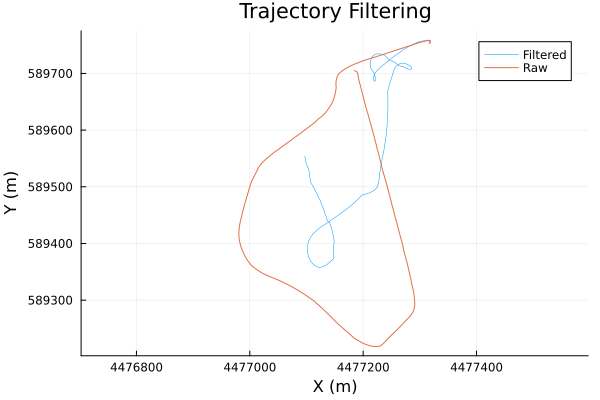

In [5]:
filter_traj_trial1 = DataFrame(CSV.File("trials/filter-trial1.csv"))

plot(title="Trajectory Filtering", xlabel="X (m)", ylabel="Y (m)", aspect_ratio=:equal)
plot!(filter_traj_trial1[3:end, "pos_x"], filter_traj_trial1[3:end, "pos_y"], label="Filtered", linewidth=0.5)
plot!(raw_traj[:, "pos_x"], raw_traj[:, "pos_y"], label="Raw")

In [6]:
cov_trial1 = DataFrame(CSV.File("trials/covariance-trial1.csv"))
timestamps = cov_trial1[:, "timestamp"]

plot(title="Estimate Standard Deviations", xlabel="Time(s)", ylabel="σᵢᵢ", yscale=:log10, ylim=(1e-3, 1))
plot!(timestamps, sqrt.(cov_trial1[:, "c1"]), label="X Position (m)")
plot!(timestamps, sqrt.(cov_trial1[:, "c4"]), label="Y Position (m)")
plot!(timestamps, sqrt.(cov_trial1[:, "c9"]), label="Heading (rad)")

DomainError: DomainError with -1.0e-6:
sqrt was called with a negative real argument but will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

# Trial 2 - Better
Tuning matricies are the same as Trial 1
```
state_cov_matrix_t curr_state_cov{{1, 0, 0},
                                  {0, 1, 0},
                                  {0, 0, 1}};
state_cov_matrix_t process_noise{{0.0001, 0, 0},
                                  {0, 0.0001, 0},
                                  {0, 0, 0.000001}};
```
The difference here is that the UKF was run with skipping timesteps where velocity = 0.

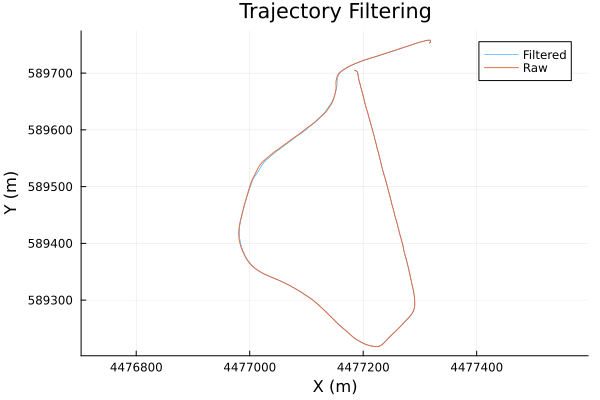

In [4]:
filter_traj_trial2 = DataFrame(CSV.File("trials/filter-trial2.csv"))

plot(title="Trajectory Filtering", xlabel="X (m)", ylabel="Y (m)", aspect_ratio=:equal)
plot!(filter_traj_trial2[3:end, "pos_x"], filter_traj_trial2[3:end, "pos_y"], label="Filtered", linewidth=0.5)
plot!(raw_traj[:, "pos_x"], raw_traj[:, "pos_y"], label="Raw")

In [ ]:
plot(title="Raw-Filtered Difference", xlabel="", ylabel="|Raw - Filtered| (m)")
plot!([norm(x[1:2] - xhat[1:2]) for (xhat,x) in zip(Xhat, X)], label="Time (s)")
plot!([norm(x[1:2] - [px; py]) for (px,py,x) in zip(px, py, X)], label="Filtered (Teensy)")

In [8]:
cov_trial2 = DataFrame(CSV.File("trials/covariance-trial2.csv"))
timestamps = cov_trial2[:, "timestamp"]

plot(title="Estimate Standard Deviations", xlabel="Time(s)", ylabel="σᵢᵢ", yscale=:log10, ylim=(1e-3, 1))
plot!(timestamps, sqrt.(cov_trial2[:, "c1"]), label="X Position (m)")
plot!(timestamps, sqrt.(cov_trial2[:, "c4"]), label="Y Position (m)")
plot!(timestamps, sqrt.(cov_trial2[:, "c9"]), label="Heading (rad)")

DomainError: DomainError with -1.4e-5:
sqrt was called with a negative real argument but will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).